<a href="https://colab.research.google.com/github/zeguii/Projeto-tmdb/blob/main/tmdb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

df_credits = pd.read_csv('/content/tmdb_5000_credits.csv')
df_movies = pd.read_csv('/content/tmdb_5000_movies.csv')

print("\n--- Informações do DataFrame de Filmes (df_movies) ---")
print('Primeiras duas linhas: ')
print(df_movies.head(2))
print("\nColunas de df_movies:")
print(df_movies.columns.tolist())

print("\n\n--- Informações do DataFrame de Créditos (df_credits) ---")
print("Primeiras 2 linhas:")
print(df_credits.head(2))
print("\nColunas de df_credits:")
print(df_credits.columns.tolist())

df = pd.merge(df_movies,df_credits,left_on='id',right_on='movie_id')

df = df.rename(columns={'title_x': 'title'})
print("-> Coluna 'title_x' renomeada para 'title'.")

df = df.drop(['movie_id', 'title_y'], axis=1)
print("-> Colunas redundantes ('movie_id', 'title_y') removidas.")

print("\n\n--- Verificando o DataFrame final unificado ---")
print(f"Dimensões do DataFrame final: {df.shape}")
print("Colunas do DataFrame final:")
print(df.columns.tolist())
print("\nPrévia do DataFrame final:")
print(df[['id', 'title', 'cast']].head(2))




--- Informações do DataFrame de Filmes (df_movies) ---
Primeiras duas linhas: 
      budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   

                                       homepage     id  \
0                   http://www.avatarmovie.com/  19995   
1  http://disney.go.com/disneypictures/pirates/    285   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   

                             original_title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   

                                            overview  popularity  \
0  In the 22nd century, a paraplegic Marine is di...  150.437577   
1  Captain Barbossa, long believed to be d

In [ ]:
import pandas as pd
import numpy as np
import ast

linhas_originais = df.shape[0]

df = df[(df['budget'] > 0) & (df['revenue'] > 0)]

linhas_finais = df.shape[0]
print(f"-> Removidas {linhas_originais - linhas_finais} linhas com orçamento ou receita zerados.")

def extrair_nomes(texto_json):
    try:
        lista_de_objetos = ast.literal_eval(texto_json)
        nomes = [obj['name'] for obj in lista_de_objetos]
        return nomes
    except:
        return []

df['genres'] = df['genres'].apply(extrair_nomes)
df['keywords'] = df['keywords'].apply(extrair_nomes)

print("\n\n--- Verificando o DataFrame após a limpeza e preparação ---")
print(f"Dimensões do DataFrame final: {df.shape}")
print("\nPrévia das colunas transformadas:")
print(df[['title', 'budget', 'revenue', 'genres', 'keywords']].head(3))

-> Removidas 0 linhas com orçamento ou receita zerados.


--- Verificando o DataFrame após a limpeza e preparação ---
Dimensões do DataFrame final: (3229, 22)

Prévia das colunas transformadas:
                                      title     budget     revenue genres  \
0                                    Avatar  237000000  2787965087     []   
1  Pirates of the Caribbean: At World's End  300000000   961000000     []   
2                                   Spectre  245000000   880674609     []   

                                            keywords  
0  [culture clash, future, space war, space colon...  
1  [ocean, drug abuse, exotic island, east india ...  
2  [spy, based on novel, secret agent, sequel, mi...  



--- Resumo Estatístico (Valores de Budget/Revenue em Milhões) ---
            budget       revenue  runtime  vote_average  popularity
count      3229.00  3.229000e+03  3229.00       3229.00     3229.00
mean         40.65  1.212400e+02   110.72          6.31       29.03
std    44396741.80  1.863029e+08    20.97          0.87       36.17
min           0.00  0.000000e+00    41.00          0.00        0.02
25%          10.50  1.700000e+01    96.00          5.80       10.45
50%          25.00  5.518000e+01   107.00          6.30       20.41
75%          55.00  1.462900e+02   121.00          6.90       37.34
max         380.00  2.787970e+03   338.00          8.50      875.58


--- Calculando e Visualizando a Matriz de Correlação ---


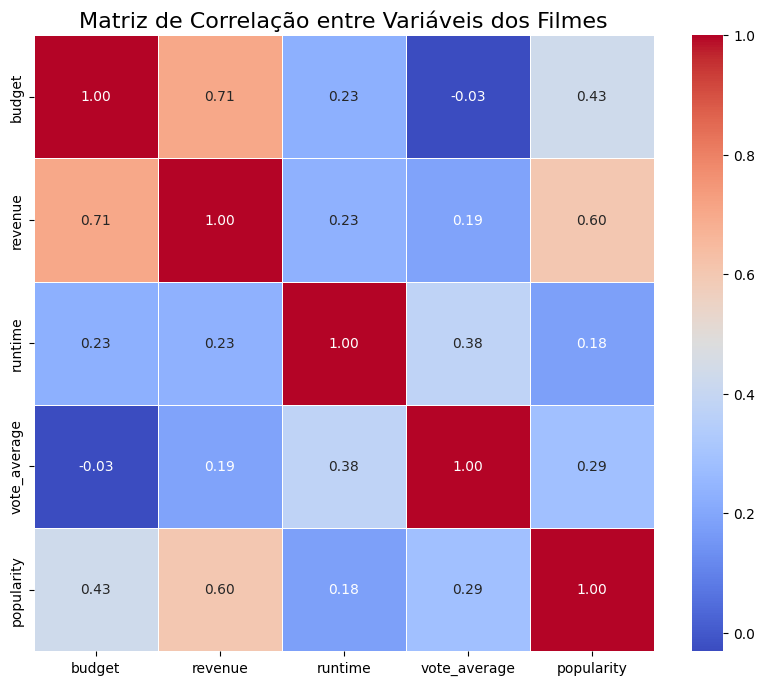

In [ ]:
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
import seaborn as sns

colunas_numericas = ['budget', 'revenue', 'runtime', 'vote_average', 'popularity']

resumo_estatistico = df[colunas_numericas].describe()

resumo_estatistico.loc[['mean', 'min', '25%', '50%', '75%', 'max'], ['budget', 'revenue']] = \
    resumo_estatistico.loc[['mean', 'min', '25%', '50%', '75%', 'max'], ['budget', 'revenue']] / 1000000

print("\n--- Resumo Estatístico (Valores de Budget/Revenue em Milhões) ---")
print(resumo_estatistico.round(2))

print("\n\n--- Calculando e Visualizando a Matriz de Correlação ---")

correlation_matrix = df[colunas_numericas].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix,
            annot=True,
            cmap='coolwarm',
            fmt='.2f',
            linewidths=.5)

plt.title('Matriz de Correlação entre Variáveis dos Filmes', fontsize=16)
plt.show()
